In [ ]:

import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

import rpy2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm

In [ ]:
df=pd.read_csv('forecasting_Air_pollution1.csv')
df.head()
print(df.isnull().sum())

date         0
dew          0
temp         0
press        0
wnd_spd      0
snow         0
rain         0
pollution    0
dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:


# Check for duplicates


In [ ]:
df['Date']=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M')

df.head()


,date,dew,temp,press,wnd_spd,snow,rain,pollution,Date
0,02-01-2010 00:00,-16,-4.0,1020.0,1.79,0,0,129,2010-01-02 00:00:00
1,02-01-2010 01:00,-15,-4.0,1020.0,2.68,0,0,148,2010-01-02 01:00:00
2,02-01-2010 02:00,-11,-5.0,1021.0,3.57,0,0,159,2010-01-02 02:00:00
3,02-01-2010 03:00,-7,-5.0,1022.0,5.36,1,0,181,2010-01-02 03:00:00
4,02-01-2010 04:00,-7,-5.0,1022.0,6.25,2,0,138,2010-01-02 04:00:00


In [ ]:
df.shape

(43800, 9)

In [ ]:
df['year']=df.Date.dt.year
df['month']=df.Date.dt.month

In [ ]:
df.set_index('date',inplace=True)
pollution_data=df['pollution']

In [ ]:
print(pollution_data.duplicated().sum())

# Remove duplicates
pollution_data = pollution_data.drop_duplicates()

# Check again
print("Number of duplicates after removal:", pollution_data.duplicated().sum())

43219
Number of duplicates after removal: 0


In [ ]:
pollution_data.head()

date
02-01-2010 00:00    129
02-01-2010 01:00    148
02-01-2010 02:00    159
02-01-2010 03:00    181
02-01-2010 04:00    138
Name: pollution, dtype: int64

Text(0, 0.5, 'pollution')

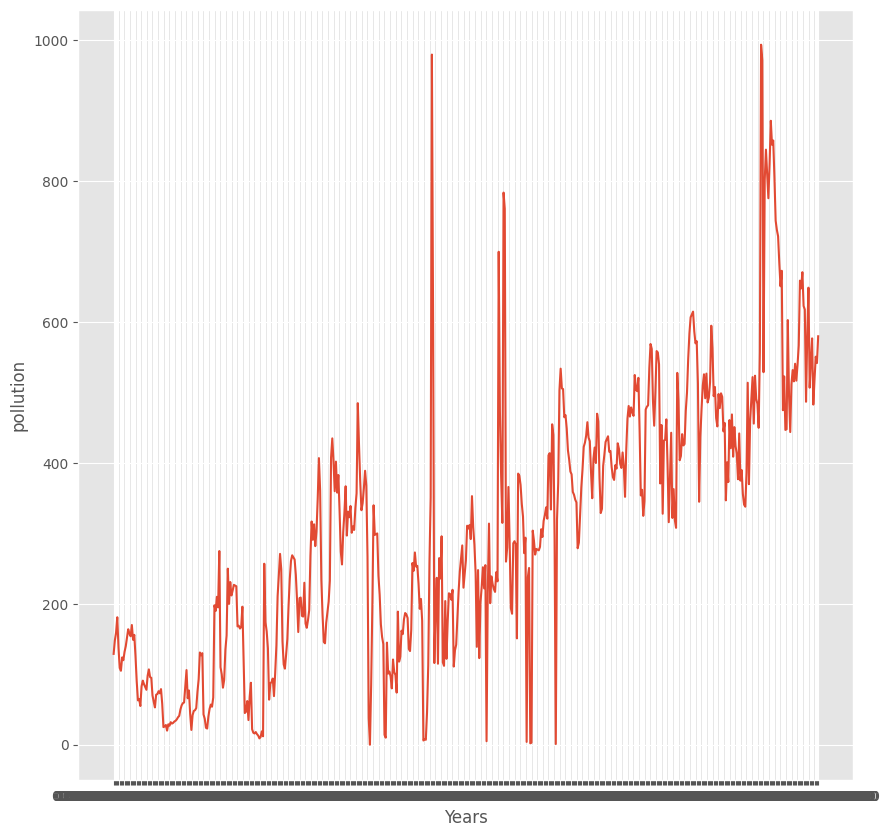

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(pollution_data)
plt.xlabel('Years')
plt.ylabel('pollution')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
pollution_data_log=np.log10(pollution_data)
pollution_data_log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


date
02-01-2010 00:00    2.110590
02-01-2010 01:00    2.170262
02-01-2010 02:00    2.201397
02-01-2010 03:00    2.257679
02-01-2010 04:00    2.139879
                      ...   
31-12-2014 19:00    0.903090
31-12-2014 20:00    1.000000
31-12-2014 21:00    1.000000
31-12-2014 22:00    0.903090
31-12-2014 23:00    1.079181
Name: pollution, Length: 43800, dtype: float64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
# Adjust the test_size and random_state parameters as needed
train_size = 0.8  # 80% train, 20% test
pollution_data_log_train, pollution_data_log_test = train_test_split(pollution_data_log, train_size=train_size, shuffle=False)


In [ ]:
print(pollution_data_log_train.head())


date
02-01-2010 00:00    2.110590
02-01-2010 01:00    2.170262
02-01-2010 02:00    2.201397
02-01-2010 03:00    2.257679
02-01-2010 04:00    2.139879
Name: pollution, dtype: float64


In [ ]:
print(pollution_data_log_test.head())

date
01-01-2014 00:00    1.380211
01-01-2014 01:00    1.724276
01-01-2014 02:00    1.812913
01-01-2014 03:00    1.845098
01-01-2014 04:00    1.897627
Name: pollution, dtype: float64


In [ ]:
print(pollution_data_log_train.isnull().sum())  # Check for NaN values
print(np.isfinite(pollution_data_log_train).all())

0
False


In [ ]:
non_finite_mask = ~np.isfinite(pollution_data_log_train)
non_finite_positions = pollution_data_log_train.index[non_finite_mask]
print(non_finite_positions)


Index(['23-01-2010 17:00'], dtype='object', name='date')


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming pollution_data_log_train is defined and contains your training data

# Handle non-finite values
pollution_data_log_train = pollution_data_log_train.replace([np.inf, -np.inf], np.nan)

# Identify specific index with non-finite value
specific_index = '23-01-2010 17:00'

# Check if the specific index has non-finite value
if not np.isfinite(pollution_data_log_train.loc[specific_index]):
    print(f"Non-finite value found at index: {specific_index}")

    # Option 1: Replace with mean or median of the series
    mean_value = pollution_data_log_train.mean()
    pollution_data_log_train.loc[specific_index] = mean_value

    # Option 2: Drop the row with the non-finite value
    # pollution_data_log_train = pollution_data_log_train.drop(specific_index)

try:
    model = ARIMA(pollution_data_log_train, order=(1, 0, 1))
    model_fit = model.fit()

    # Print model summary
    print(model_fit.summary())

except Exception as e:
    print(f"Error occurred during model fitting: {str(e)}")


Non-finite value found at index: 23-01-2010 17:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              pollution   No. Observations:                35040
Model:                 ARIMA(1, 0, 1)   Log Likelihood               22047.373
Date:                Tue, 16 Jul 2024   AIC                         -44086.746
Time:                        09:28:09   BIC                         -44052.889
Sample:                             0   HQIC                        -44075.963
                              - 35040                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7998      0.019     97.081      0.000       1.764       1.836
ar.L1          0.9529      0.002    536.294      0.000       0.949       0.956
ma.L1          0.0928      0.003     27.951      0.0

In [ ]:
pred_99=model_fit.get_forecast(steps=61,alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
# Assuming model_fit is your fitted SARIMAX model
#pred_99 = model_fit.get_forecast(steps=61, alpha=0.05)

# Extracting forecasted values and confidence intervals
forecast_values = pred_99.predicted_mean
forecast_ci = pred_99.conf_int()

# Print the forecasted values
print("Forecasted values:")
print(forecast_values)

# Print the confidence intervals
print("Confidence intervals:")
print(forecast_ci)

Forecasted values:
35040    1.386601
35041    1.406075
35042    1.424631
35043    1.442313
35044    1.459161
           ...   
35096    1.772156
35097    1.773461
35098    1.774704
35099    1.775888
35100    1.777017
Name: predicted_mean, Length: 61, dtype: float64
Confidence intervals:
       lower pollution  upper pollution
35040         1.143876         1.629326
35041         1.054877         1.757273
35042         0.998208         1.851054
35043         0.957597         1.927028
35044         0.927020         1.991302
...                ...              ...
35096         0.902772         2.641541
35097         0.903910         2.643012
35098         0.905002         2.644406
35099         0.906050         2.645727
35100         0.907054         2.646980

[61 rows x 2 columns]


NaN values in pollution_data_log_test: 0
NaN values in forecasted_y: <bound method NDFrame._add_numeric_operations.<locals>.sum of 2014-01-01 00:00:00    False
2014-01-01 01:00:00    False
2014-01-01 02:00:00    False
2014-01-01 03:00:00    False
2014-01-01 04:00:00    False
                       ...  
2014-01-03 08:00:00    False
2014-01-03 09:00:00    False
2014-01-03 10:00:00    False
2014-01-03 11:00:00    False
2014-01-03 12:00:00    False
Freq: H, Length: 61, dtype: bool>


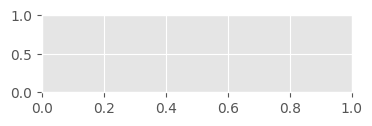

In [ ]:
forecast_index = pd.date_range(start=pollution_data_log_train.index[-1], periods=62, freq='H')[1:]  # Adjust frequency if needed
forecasted_y = pd.Series(pred_99.predicted_mean.values, index=forecast_index)

# Check for NaN values
print("NaN values in pollution_data_log_test:", pollution_data_log_test.isnull().sum())
print("NaN values in forecasted_y:", forecasted_y.isnull().sum)

0.3455733090176779

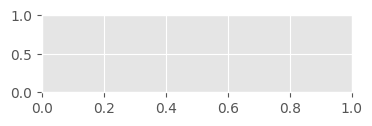

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
# Slice pollution_data_log_test to match the length of forecasted_y
mean_absolute_error(pollution_data_log_test[:len(forecasted_y)], forecasted_y)

In [ ]:
from sklearn.metrics import mean_squared_error

# Convert forecasted_y to a numpy array if it's not already
forecasted_y = np.array(forecasted_y)

# Slice pollution_data_log_test to match the length of forecasted_y
pollution_data_log_test_sliced = pollution_data_log_test[:len(forecasted_y)]

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(pollution_data_log_test_sliced, forecasted_y)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.15017589408307516
